In [9]:
import pandas as pd
import numpy as np
data = pd.read_csv('studentinfo.csv')

print('Dimensions are ', data.shape)
print()
#print('Counts by Education:', data.groupby('highest_education').count())
print('Counts by Education:', data.groupby('highest_education').size())
#.count retorna a quantidade de valores não nulos para cada coluna
#.size retorna a quantidade de valores não nulos para cada grupo
print()
print('Counts by Final Result:', data.groupby('final_result').size())
data.head(3)

Dimensions are  (32593, 12)

Counts by Education: highest_education
A Level or Equivalent          14045
HE Qualification                4730
Lower Than A Level             13158
No Formal quals                  347
Post Graduate Qualification      313
dtype: int64

Counts by Final Result: final_result
Distinction     3024
Fail            7052
Pass           12361
Withdrawn      10156
dtype: int64


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


In the context of a dataset about student information and academic success, imd_band likely refers to the Index of Multiple Deprivation (IMD) band of the student's residential area.

The IMD is a UK government qualitative study of deprived areas in English local councils. Deprivation covers a broad range of issues and refers to unmet needs caused by a lack of resources of all kinds, not just financial. The IMD divides regions into deciles, where the 1st decile is the most deprived 10% of areas, and the 10th is the least deprived.

So, in your dataset, imd_band could be a categorical variable indicating the decile of deprivation of the area where the student lives. This could be used to study the impact of socio-economic factors on academic success.



In [11]:

#print(data['gender'].unique())
#print(data['disability'].unique())
#print(data['final_result'].unique())

g_mapping = {'M': 0, 'F': 1}
d_mapping = {'N': 0, 'Y': 1}
fr_mapping = {'Pass': 1, 'Distinction': 1, 'Withdrawn': 0, 'Fail': 0}

data['gender'] = data['gender'].map(g_mapping)
data['disability'] = data['disability'].map(d_mapping)
data['final_result'] = data['final_result'].map(fr_mapping)

data.tail(5)

['M' 'F']
['N' 'Y']
['Pass' 'Withdrawn' 'Fail' 'Distinction']


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,1,Wales,Lower Than A Level,10-20,0-35,0,30,0,0
32589,GGG,2014J,2645731,1,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,0,1
32590,GGG,2014J,2648187,1,South Region,A Level or Equivalent,20-30%,0-35,0,30,1,1
32591,GGG,2014J,2679821,1,South East Region,Lower Than A Level,90-100%,35-55,0,30,0,0
32592,GGG,2014J,2684003,1,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,0,1


The difference between replace() and map() is in their scope and behavior:

replace(): This function is more general. It can operate on the entire DataFrame, not just on a single column. It only replaces the values that it finds in the DataFrame that match with the dictionary keys and leaves all other values in the DataFrame as they are.

map(): This function is applied on a single Series (or column of a DataFrame). It replaces all values of the Series based on the dictionary keys. If there is a value in the Series that is not found in the dictionary keys, map() will convert that value to NaN.

So, in your case, data.replace({'gender': g_mapping}, inplace=True) will replace the values in the 'gender' column based on g_mapping and leave all other values as they are. If there is a value in 'gender' that is not found in g_mapping, it will not be converted to NaN, it will just be left as it is.

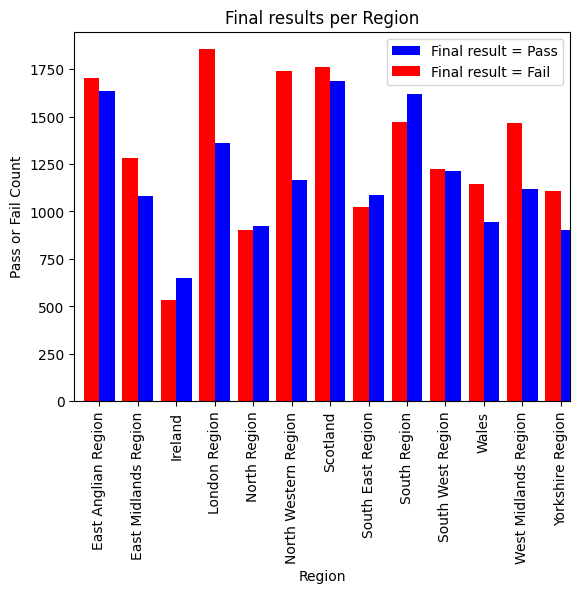

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline 

# Group the data by region and count the number of '1' and '0' in each region
region_counts_pass = data[data['final_result'] == 1].groupby('region').size()
region_counts_fail = data[data['final_result'] == 0].groupby('region').size()

# Plot the bar chart
fig, ax = plt.subplots()
region_counts_pass.plot(kind='bar', color='blue', ax=ax, position=0, width=0.4, label='Final result = Pass')
region_counts_fail.plot(kind='bar', color='red', ax=ax, position=1, width=0.4, label='Final result = Fail')

plt.title('Final results per Region')
plt.xlabel('Region')
plt.ylabel('Pass or Fail Count')
plt.legend() # Show the legend

#plt.show() # Show the plot, not needed because of %matplotlib inline


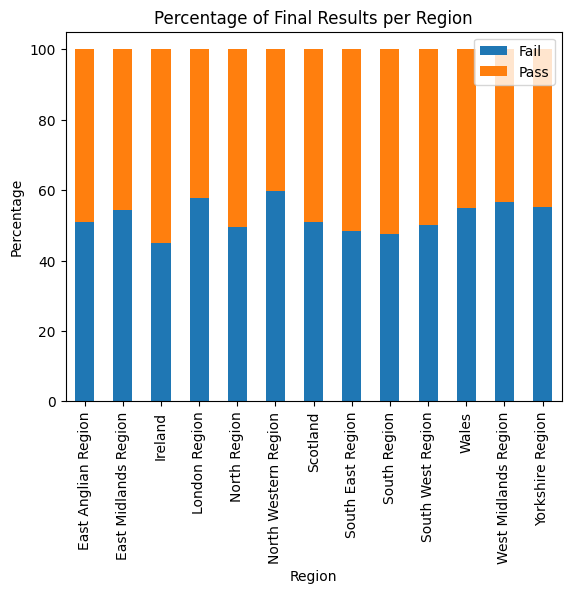

In [17]:
# Group the data by region and count the number of '1' and '0' in each region
region_counts = data.groupby('region')['final_result'].value_counts().unstack()

# Calculate the percentages
region_percentages = region_counts.div(region_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart
fig, ax = plt.subplots()
region_percentages.plot(kind='bar', stacked=True, ax=ax)

plt.title('Percentage of Final Results per Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.legend(['Fail', 'Pass'])

#plt.show() # Show the plot, not needed because of %matplotlib inline

Text(0, 0.5, 'Percentage')

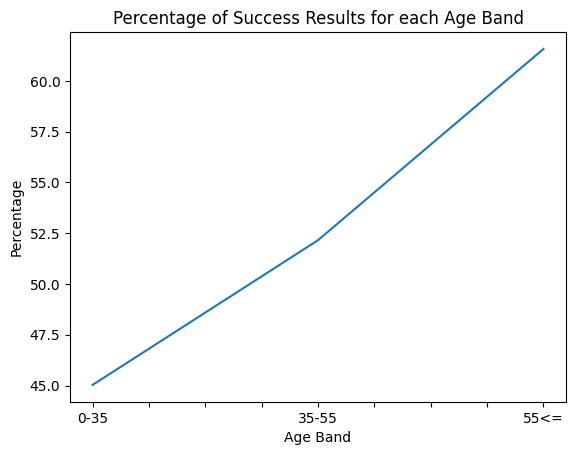

In [20]:
result_counts = data.groupby('age_band')['final_result'].value_counts().unstack()
result_percentages = result_counts[1] / result_counts.sum(axis=1) * 100

result_percentages.plot(kind='line')

plt.title('Percentage of Success Results for each Age Band')
plt.xlabel('Age Band')
plt.ylabel('Percentage')



MODELING

In [ ]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Assuming `data` is your DataFrame and 'final_result' is what you want to predict
X = data.drop('final_result', axis=1)  # Features / colunas que vao ser usadas para prever
y = data['final_result']  # Target variable / coluna que vai ser prevista

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVM Classifier
clf = svm.SVC(kernel='linear')  # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)